In [39]:
import torch
import torch.nn as nn
import torch.functional as f
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

In [40]:
transform=transforms.Compose([
    transforms.Resize((244,244)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
]
)

In [41]:
dataset=datasets.ImageFolder(root="C:\\Users\\anish\\Downloads\\archive\\PetImages",transform=transform)

In [42]:
train_size=(len(dataset)//10)*8
val_size=(len(dataset)//10)
test_size=len(dataset)-train_size-val_size

In [43]:
train_data,val_data,test_data=random_split(dataset,[train_size,val_size,test_size])

In [44]:
train_loader=DataLoader(train_data,batch_size=32,shuffle=True,num_workers=2)
val_loader=DataLoader(val_data,batch_size=32,shuffle=False,num_workers=2)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False,num_workers=2)

In [45]:
torch.manual_seed(41)
model=nn.Sequential()

In [46]:
conv1=nn.Conv2d(in_channels=3, out_channels=16,kernel_size=3,padding=1)
bn1=nn.BatchNorm2d(16)
relu1=nn.ReLU()
maxpool1=nn.MaxPool2d(kernel_size=3,stride=2)

In [47]:
conv2=nn.Conv2d(in_channels=16, out_channels=32,kernel_size=3,padding=1)
bn2=nn.BatchNorm2d(32)
relu2=nn.ReLU()
maxpool2=nn.MaxPool2d(kernel_size=3,stride=2)

In [48]:
conv3=nn.Conv2d(in_channels=32, out_channels=64,kernel_size=3,padding=1)
bn3=nn.BatchNorm2d(64)
relu3=nn.ReLU()
maxpool3=nn.MaxPool2d(kernel_size=2,stride=2)

In [49]:
conv4=nn.Conv2d(in_channels=64, out_channels=100,kernel_size=3,padding=1)
bn4=nn.BatchNorm2d(100)
relu4=nn.ReLU()
maxpool4=nn.MaxPool2d(kernel_size=2,stride=2)

In [50]:
conv5=nn.Conv2d(in_channels=100, out_channels=128,kernel_size=3,padding=1)
bn5=nn.BatchNorm2d(128)
relu5=nn.ReLU()
maxpool5=nn.AdaptiveAvgPool2d((1,1))

In [51]:
drop1=nn.Dropout()
flatten=nn.Flatten()
l1=nn.Linear(in_features=128,out_features=256)
bn6=nn.BatchNorm1d(256)
relu6=nn.ReLU()
drop2=nn.Dropout()
l2=nn.Linear(in_features=256,out_features=128)
bn7=nn.BatchNorm1d(128)
relu7=nn.ReLU()
drop3=nn.Dropout()
l3=nn.Linear(in_features=128,out_features=30)
bn8=nn.BatchNorm1d(30)
relu8=nn.ReLU()
out=nn.Linear(in_features=30,out_features=2)

In [52]:
model.append(conv1)
model.append(bn1)
model.append(relu1)
model.append(maxpool1)
model.append(conv2)
model.append(bn2)
model.append(relu2)
model.append(maxpool2)
model.append(conv3)
model.append(bn3)
model.append(relu3)
model.append(maxpool3)
model.append(conv4)
model.append(bn4)
model.append(relu4)
model.append(maxpool4)
model.append(conv5)
model.append(bn5)
model.append(relu5)
model.append(maxpool5)
model.append(drop1)
model.append(flatten)
model.append(l1)
model.append(bn6)
model.append(relu6)
model.append(drop2)
model.append(l2)
model.append(bn7)
model.append(relu7)
model.append(drop3)
model.append(l3)
model.append(bn8)
model.append(relu8)
model.append(out)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(64, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, stride=

In [53]:
import numpy as np

In [54]:
from tqdm import tqdm

In [55]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [56]:
losses=[]
val_losses=[]
train_accuracies=[]
val_accuracies=[]

In [57]:
for epoch in tqdm(range(15)):
    print(f"Epoch {epoch}:\n")
 
    model.train()
    epoch_losses=[]
    correct_train = 0
    total_train = 0
    
    for images,labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs=model(images)
        loss=loss_fn(outputs,labels)
        epoch_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    train_loss = np.mean(epoch_losses)
    train_accuracy = 100 * correct_train / total_train
    print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.2f}%\n")

    model.eval()
    epoch_val_losses=[]
    correct_val = 0
    total_val = 0
    
    with torch.no_grad():
        for val_images,val_labels in tqdm(val_loader):
            val_outputs=model(val_images)
            val_loss=loss_fn(val_outputs,val_labels)
            epoch_val_losses.append(val_loss.item())
            
            _, predicted = torch.max(val_outputs.data, 1)
            total_val += val_labels.size(0)
            correct_val += (predicted == val_labels).sum().item()
    
    val_loss = np.mean(epoch_val_losses)
    val_accuracy = 100 * correct_val / total_val
    print(f"Val loss: {val_loss:.4f}, Val accuracy: {val_accuracy:.2f}%")
    
    # Store metrics
    losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    scheduler.step()  

  0%|          | 0/15 [00:00<?, ?it/s]

Epoch 0:



100%|██████████| 625/625 [23:59<00:00,  2.30s/it]


Train loss: 0.6120, Train accuracy: 66.11%



  7%|▋         | 1/15 [26:10<6:06:32, 1570.86s/it]

Val loss: 0.5936, Val accuracy: 68.19%
Epoch 1:



100%|██████████| 625/625 [19:52<00:00,  1.91s/it]


Train loss: 0.5389, Train accuracy: 73.56%



 13%|█▎        | 2/15 [47:30<5:03:17, 1399.81s/it]

Val loss: 0.5913, Val accuracy: 69.11%
Epoch 2:



100%|██████████| 625/625 [19:36<00:00,  1.88s/it]


Train loss: 0.4912, Train accuracy: 77.16%



 20%|██        | 3/15 [1:08:34<4:27:33, 1337.82s/it]

Val loss: 0.4775, Val accuracy: 76.63%
Epoch 3:



100%|██████████| 625/625 [19:46<00:00,  1.90s/it]


Train loss: 0.4449, Train accuracy: 79.90%



 27%|██▋       | 4/15 [1:29:49<4:00:40, 1312.73s/it]

Val loss: 0.4146, Val accuracy: 81.87%
Epoch 4:



100%|██████████| 625/625 [19:41<00:00,  1.89s/it]


Train loss: 0.3981, Train accuracy: 82.65%



 33%|███▎      | 5/15 [1:50:58<3:36:11, 1297.18s/it]

Val loss: 0.4204, Val accuracy: 81.23%
Epoch 5:



100%|██████████| 625/625 [19:43<00:00,  1.89s/it]


Train loss: 0.3215, Train accuracy: 86.62%



 40%|████      | 6/15 [2:12:11<3:13:18, 1288.78s/it]

Val loss: 0.3109, Val accuracy: 87.56%
Epoch 6:



100%|██████████| 625/625 [19:52<00:00,  1.91s/it]


Train loss: 0.2994, Train accuracy: 87.44%



 47%|████▋     | 7/15 [2:33:34<2:51:35, 1286.93s/it]

Val loss: 0.3248, Val accuracy: 86.35%
Epoch 7:



100%|██████████| 625/625 [19:53<00:00,  1.91s/it]


Train loss: 0.2852, Train accuracy: 88.21%



 53%|█████▎    | 8/15 [2:54:56<2:29:58, 1285.53s/it]

Val loss: 0.3051, Val accuracy: 87.56%
Epoch 8:



100%|██████████| 625/625 [19:47<00:00,  1.90s/it]


Train loss: 0.2765, Train accuracy: 88.63%



 60%|██████    | 9/15 [3:16:13<2:08:17, 1282.86s/it]

Val loss: 0.3287, Val accuracy: 85.63%
Epoch 9:



100%|██████████| 625/625 [19:52<00:00,  1.91s/it]


Train loss: 0.2662, Train accuracy: 89.20%



 67%|██████▋   | 10/15 [3:37:34<1:46:51, 1282.26s/it]

Val loss: 0.3125, Val accuracy: 86.75%
Epoch 10:



100%|██████████| 625/625 [20:00<00:00,  1.92s/it]


Train loss: 0.2531, Train accuracy: 89.63%



 73%|███████▎  | 11/15 [3:59:04<1:25:38, 1284.57s/it]

Val loss: 0.2689, Val accuracy: 89.36%
Epoch 11:



100%|██████████| 625/625 [19:51<00:00,  1.91s/it]


Train loss: 0.2541, Train accuracy: 89.88%



 80%|████████  | 12/15 [4:20:26<1:04:10, 1283.60s/it]

Val loss: 0.2681, Val accuracy: 89.88%
Epoch 12:



100%|██████████| 625/625 [19:52<00:00,  1.91s/it]


Train loss: 0.2581, Train accuracy: 89.58%



 87%|████████▋ | 13/15 [4:41:48<42:46, 1283.31s/it]  

Val loss: 0.2704, Val accuracy: 89.56%
Epoch 13:



100%|██████████| 625/625 [19:57<00:00,  1.92s/it]


Train loss: 0.2491, Train accuracy: 89.94%



 93%|█████████▎| 14/15 [5:03:14<21:24, 1284.10s/it]

Val loss: 0.2667, Val accuracy: 90.04%
Epoch 14:



100%|██████████| 625/625 [19:51<00:00,  1.91s/it]


Train loss: 0.2478, Train accuracy: 89.89%



100%|██████████| 15/15 [5:24:34<00:00, 1298.29s/it]

Val loss: 0.2654, Val accuracy: 90.12%


Testing: 100%|██████████| 79/79 [01:56<00:00,  1.48s/it]



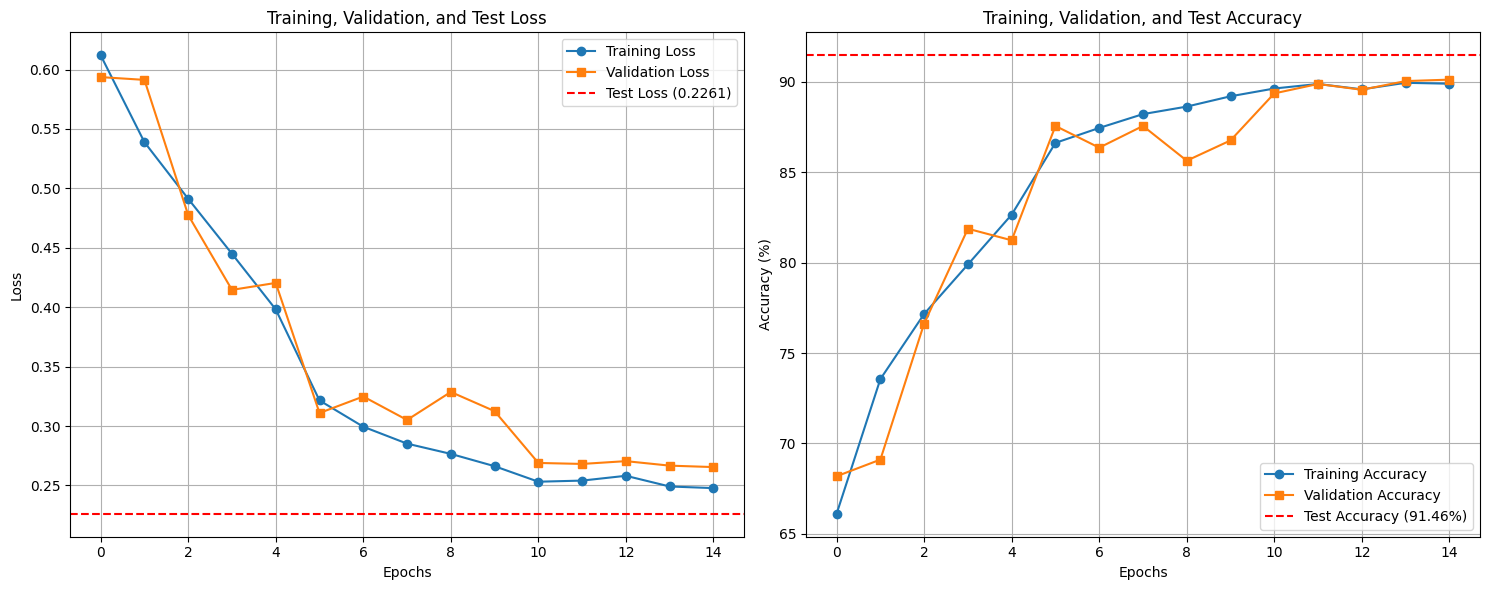


Final Results:
Train - Loss: 0.2478, Accuracy: 89.89%
Validation - Loss: 0.2654, Accuracy: 90.12%
Test - Loss: 0.2261, Accuracy: 91.46%


In [58]:
import matplotlib.pyplot as plt

# Calculate test accuracy only
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

correct_test = 0
total_test = 0
test_loss_total = 0

with torch.no_grad():
    for test_images, test_labels in tqdm(test_loader, desc="Testing"):
        test_images, test_labels = test_images.to(device), test_labels.to(device)
        test_outputs = model(test_images)
        test_loss = loss_fn(test_outputs, test_labels)
        test_loss_total += test_loss.item()
        
        _, predicted = torch.max(test_outputs.data, 1)
        total_test += test_labels.size(0)
        correct_test += (predicted == test_labels).sum().item()

final_test_loss = test_loss_total / len(test_loader)
test_accuracy = 100 * correct_test / total_test

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Loss curves
ax1.plot(range(len(losses)), losses, label='Training Loss', marker='o')
ax1.plot(range(len(val_losses)), val_losses, label='Validation Loss', marker='s')
ax1.axhline(y=final_test_loss, color='red', linestyle='--', label=f'Test Loss ({final_test_loss:.4f})')
ax1.set_title('Training, Validation, and Test Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot 2: Accuracy curves
ax2.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy', marker='o')
ax2.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy', marker='s')
ax2.axhline(y=test_accuracy, color='red', linestyle='--', label=f'Test Accuracy ({test_accuracy:.2f}%)')
ax2.set_title('Training, Validation, and Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Results:")
print(f"Train - Loss: {losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.2f}%")
print(f"Validation - Loss: {val_losses[-1]:.4f}, Accuracy: {val_accuracies[-1]:.2f}%")
print(f"Test - Loss: {final_test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

In [59]:
# Save the trained model
import os

# Create a models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the entire model (architecture + weights)
torch.save(model, 'models/cat_dog_classifier_full.pth')


training_data = {
    'losses': losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
    'final_test_loss': final_test_loss,
    'test_accuracy': test_accuracy
}
torch.save(training_data, 'models/training_metrics.pth')


In [64]:

loaded_model = torch.load('models/cat_dog_classifier_full.pth',weights_only=False)
loaded_model.eval()  
loaded_model.to("cpu")


Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(64, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): ReLU()
  (15): MaxPool2d(kernel_size=2, stride=

In [88]:
classesMap={
    0:"Cat",
    1:"Dog"
}

In [60]:
from PIL import Image


In [61]:
transformImg=transforms.ToTensor()

In [115]:
path="991.jpg"
img=Image.open(path)
imgTensor=transform(img)
imgTensor=imgTensor.unsqueeze(0)

with torch.no_grad():
    output=loaded_model(imgTensor)
    
_,pred=torch.max(output.data,1)
print(classesMap[pred.item()])


Cat
